## 1. 주제
### AI 도입에 따른 일자리 변화 분석: 2024년 대비 2030년 예상 일자리 증감과 관련 요인 탐색  
**(본 분석은 실제 고용 통계가 아닌, Kaggle에서 생성된 시뮬레이션 기반 합성 데이터셋을 활용)**

### 2. 필요 데이터
- job title: 직업   
- job status: 현재까지 ai 도입후 증감   
- ai impact level: 직업에 미치는 ai 영향 예상  
- job openings: 2024년 채용 공고 수  
- projected openings: 2030년 예상 개장 수   
https://www.kaggle.com/datasets/sahilislam007/ai-impact-on-job-market-20242030/data

### 3. 분석 방법
- projected - job openings 값으로 일자리 증감량 산출 및 시각화
- ai impact level에 따른 증감 패턴 분석 (ai 영향도에 따른 일자리 증감량 경향성 확인)

### 4. 확장
- 다중 회귀 분석: 일자리 증감량을 종속변수로, 급여, ai영향도, 필수 경력 등을 독립변수로  
 일자리 증감량을 여러 변수로 설명
- 증가 직무 중심의 미래 유망 직업 추천 시스템 설계
- 실제 고용 데이터와 비교 분석
- 국가별, 산업 분야 별 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import koreanize_matplotlib

## 데이터 살펴보기  
  
**PassengerId** : 승객의 고유번호  
**Survived** : 생존 여부(0 = 사망, 1 = 생존)  
**Pclass** : 선실 등급(1 = 1등석, 2 = 2등석, 3 = 3등석)  
**Name** : 승객 이름  
**Sex** : 성별  
**Age** : 나이  
**SibSp** : 형제자매 + 배우자  
**Parch** : 부모 + 자녀  
**Ticket** : 티켓 번호  
**Fare** : 요금  
**Cabin** : 객실 번호  
**Embraked** : 탑승한 항구  

In [4]:
data = pd.read_csv("C:/Users/justi/Downloads/Titanic-Dataset.csv")
# 데이터 크기 & 변수 이름 확인
print(data.columns)
print(data.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)


In [28]:

print(data.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [ ]:
# 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 결측치 개수 확인
data.isna().sum(axis=0).sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [21]:
# 결측치 비율 확인
n = data.isnull().mean()
n = n[n>0]
n

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

<Axes: >

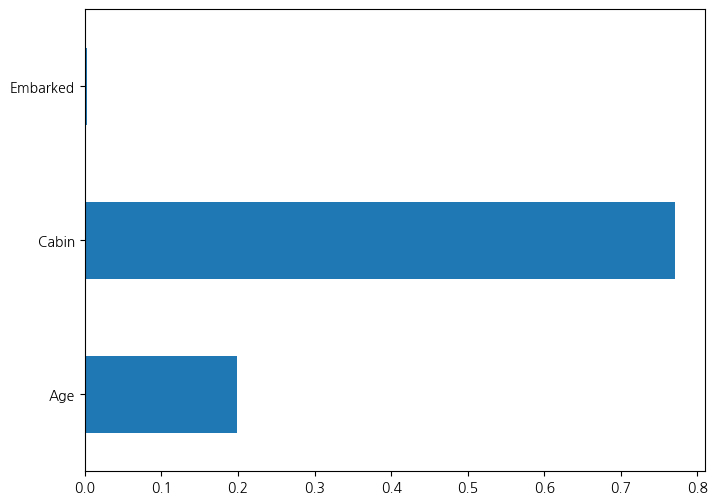

In [ ]:
# 비율 바 그래프
n.plot.barh(figsize=(8, 6))

In [25]:
# 중복행 확인
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [5]:
#원본 데이터 보존
df = data.copy()

In [6]:
# PassengerId와 Ticket은 분석에 영향이 없는 변수
## cabin 결측치가 77%로 높은 수치를 보여주기 때문에 drop
df = df.drop(columns=["Cabin",'PassengerId','Ticket'])

In [7]:
# Embarked의 결측치는 2개 이므로 최빈값으로 대체
df["Embarked"].fillna(df['Embarked'].value_counts().index[0], inplace=True)

C:\Users\justi\AppData\Local\Temp\ipykernel_4828\2761567603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df['Embarked'].value_counts().index[0], inplace=True)


In [ ]:
# 결측치 개수 확인
df['Embarked'].isna().sum()

0

In [9]:
# 범주형 변수 인코딩 남자:0 여자:1
df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})

C:\Users\justi\AppData\Local\Temp\ipykernel_4828\2029523468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})


In [ ]:
# 가족 = 형제자매 + 배우자 + 자녀 + 부모
df['family'] = df['Parch'] + df['SibSp']

In [11]:
# age 결측치를 채워넣기 위해 범주형 변수들로 age 변수를 그룹화 후 중앙값을 채택
df["Age"] = df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))

In [12]:
df['Age'].isna().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   family    891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


<Axes: ylabel='Fare'>

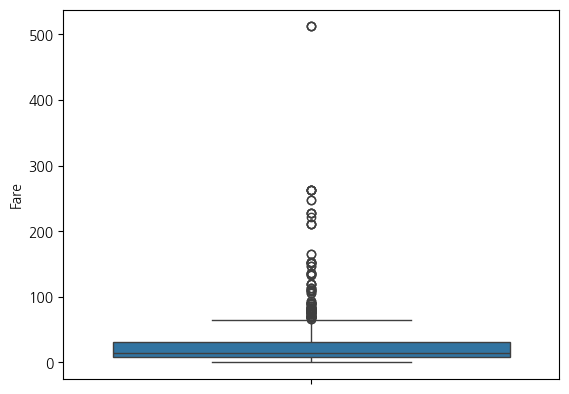

In [18]:
# 이상치 확인
sns.boxplot(data=df['Fare'])

In [ ]:
# Sex, Pclass, Embarked에 따른 생존여부
print(df.groupby("Sex")["Survived"].mean())
print(df.groupby("Pclass")["Survived"].mean())
print(df.groupby("Embarked")["Survived"].mean())

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


<Axes: xlabel='Sex', ylabel='Survived'>

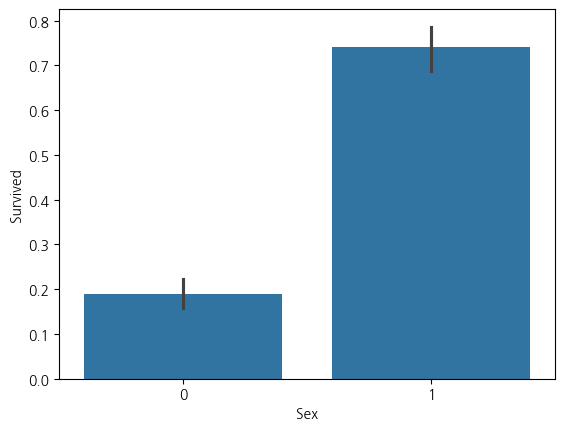

In [55]:
sns.barplot(data=df, x="Sex", y="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

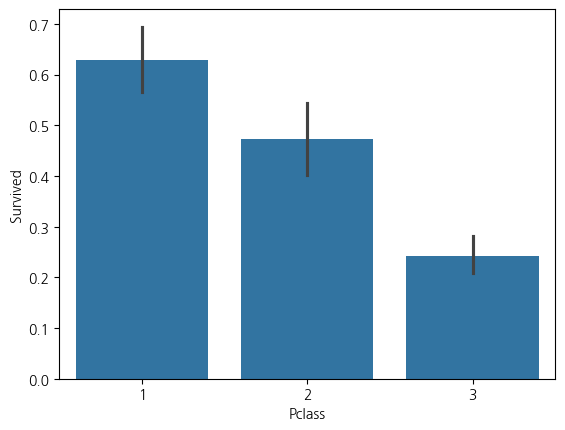

In [53]:
sns.barplot(data=df, x="Pclass", y="Survived")

<Axes: xlabel='Embarked', ylabel='Survived'>

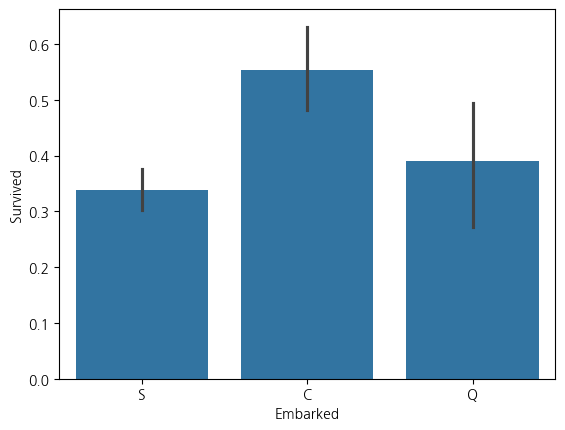

In [54]:
sns.barplot(data=df, x="Embarked", y="Survived")

In [ ]:
#생존여부에 따른 Age, family(가족 수),Fare
print(df.groupby("Survived")["Age"].mean())
print(df.groupby("Survived")["family"].mean())
print(df.groupby("Survived")["Fare"].mean())

Survived
0    29.737705
1    28.108684
Name: Age, dtype: float64
Survived
0    0.883424
1    0.938596
Name: family, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


<Axes: xlabel='Survived', ylabel='Age'>

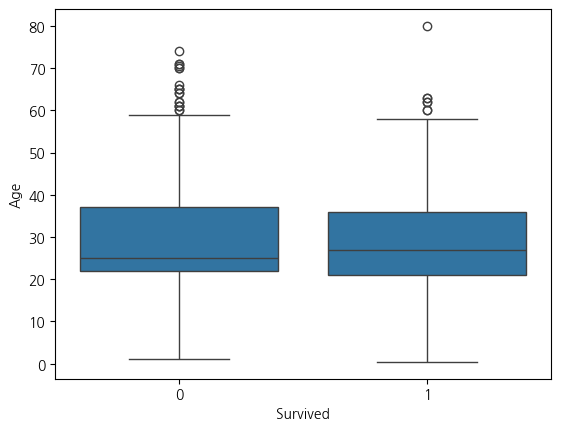

In [58]:
sns.boxplot(data=df, x="Survived", y="Age")

<Axes: xlabel='Survived', ylabel='family'>

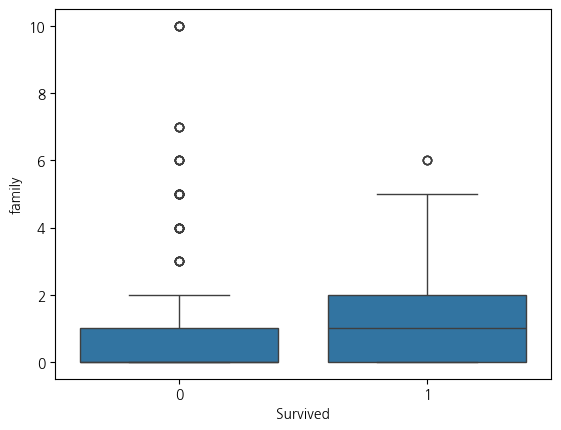

In [59]:
sns.boxplot(data=df, x="Survived", y="family")

<Axes: xlabel='Survived', ylabel='Fare'>

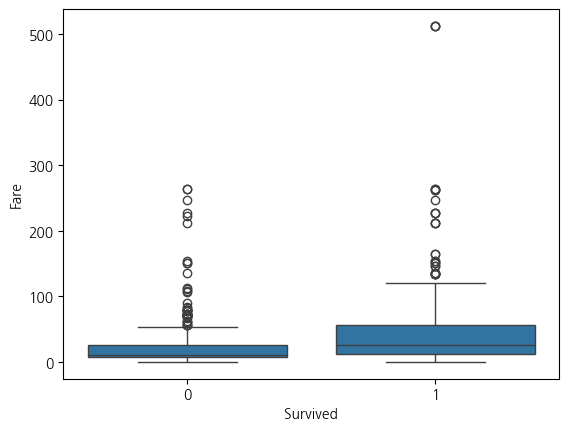

In [17]:
sns.boxplot(data=df, x="Survived", y="Fare")

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S
